In [1]:
## This file contains the basic function of read data and clean filter.
## Author: Xiang Li

###Sample
#### Imput Package
import pandas as pd
import numpy as np
import os

In [2]:
### Scatter Plot

import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 
from scipy.stats import gaussian_kde
# display plots in this notebook
%matplotlib inline

In [21]:
def plot_H3K4_H3K9(retrotransposon_name,range_limit):
    PATH_FOLDER=os.getcwd() + '/bowtie2_map2_mm10_pMXs/genes_RPKM/RPKM_ALL_READS'
    Cond1='/RPKM_H3K4'
    Cond2='/RPKM_H3K9'
    INPUT_LIST=os.listdir(PATH_FOLDER)


    INPUT_NAME='genes_read_count_5_H3K4me3_WT_MMERVK10C_34bc'
    #INPUT_PATH_1 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_5_H3K4me3_WT_island_reads_'+retrotransposon_name+'_34bc.csv'
    #INPUT_PATH_2 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_7_H3K4me3_mir34bc_KO_island_reads_'+retrotransposon_name+'_34bc.csv'
    
    INPUT_PATH_1 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_5_H3K4me3_WT_'+retrotransposon_name+'_34bc.csv'
    INPUT_PATH_2 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_7_H3K4me3_mir34bc_KO_'+retrotransposon_name+'_34bc.csv'

    
    
    df1 = pd.read_csv(INPUT_PATH_1, sep='\t', header=0)
    df2 = pd.read_csv(INPUT_PATH_2, sep='\t', header=0)
    
    RPKM_12=pd.DataFrame(df1,df2)
    #INPUT_PATH_3_a = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_April_island_reads_'+ retrotransposon_name + '_34bc.csv'
    #INPUT_PATH_3_b = PATH_FOLDER+Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_Dec_island_reads_'+retrotransposon_name + '_34bc.csv'
    #INPUT_PATH_3_c = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_10_New_H3K9me3_WT_island_reads_'+retrotransposon_name+'_34bc.csv'

    INPUT_PATH_3_a = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_April_'+ retrotransposon_name + '_34bc.csv'
    INPUT_PATH_3_b = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_Dec_'+retrotransposon_name + '_34bc.csv'
    INPUT_PATH_3_c = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_10_New_H3K9me3_WT_'+retrotransposon_name+'_34bc.csv'

    

    #INPUT_PATH_4_a = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_April_island_reads_'+retrotransposon_name+'_34bc.csv'
    #INPUT_PATH_4_b = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_Dec_island_reads_'+retrotransposon_name+'_34bc.csv'
    #INPUT_PATH_4_c = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_11_New_H3K9me3_mir34bc_KO_island_reads_'+retrotransposon_name+'_34bc.csv'

    INPUT_PATH_4_a = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_April_'+retrotransposon_name+'_34bc.csv'
    INPUT_PATH_4_b = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_Dec_'+retrotransposon_name+'_34bc.csv'
    INPUT_PATH_4_c = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_11_New_H3K9me3_mir34bc_KO_'+retrotransposon_name+'_34bc.csv'

    
    #df3_a= pd.read_csv(INPUT_PATH_3_a, sep='\t', header=0)
    df3_b= pd.read_csv(INPUT_PATH_3_b, sep='\t', header=0)
    df3_c = pd.read_csv(INPUT_PATH_3_c, sep='\t', header=0)
    df3= df3_c['RPKM'] 

    #df3 = (5*df3_a['RPKM']+23*df3_b['RPKM']+18*df3_c['RPKM'])/46.0

    #df4_a= pd.read_csv(INPUT_PATH_4_a, sep='\t', header=0)
    df4_b= pd.read_csv(INPUT_PATH_4_b, sep='\t', header=0)
    df4_c= pd.read_csv(INPUT_PATH_4_c, sep='\t', header=0)
    #df4= (5*df4_a['RPKM']+23*df4_b['RPKM']+18*df4_c['RPKM'])/46.0
    df4= df4_c['RPKM']
    
    # Calculate the point density
    xy = np.vstack([df1['RPKM'], df2['RPKM']])
    z = gaussian_kde(xy)(xy)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,5))
    
    ax[0].scatter(df1['RPKM'], df2['RPKM'], alpha=1.0,s=5,c=z, label='H3K4',edgecolor='')
    ax[0].set_xlim(-0.1*range_limit,range_limit)
    ax[0].set_ylim(-0.1*range_limit,range_limit)
    ax[0].set_xlabel('WT_RPKM')
    ax[0].set_ylabel('KO_RPKM')
    ax[0].set_title(retrotransposon_name+': '+str(len(df1))+' elements')
    ax[0].plot([-100,range_limit], [-100, range_limit], ls="--", c=".3")
    ax[0].legend(loc=2, fontsize=16)
    #plt.colorbar()

    
    xy = np.vstack([df3, df4])
    z = gaussian_kde(xy)(xy)
    ax[1].scatter(df3, df4, alpha=1.0,s=5, c=z, label='H3K9',edgecolor='')
    ax[1].set_xlim(-0.1*range_limit,range_limit)
    ax[1].set_ylim(-0.1*range_limit,range_limit)
    ax[1].set_xlabel('WT_RPKM')
    ax[1].set_ylabel('KO_RPKM')
    ax[1].set_title(retrotransposon_name+': '+str(len(df1))+' elements')
    ax[1].plot([-100,range_limit], [-100, range_limit], ls="--", c=".3")
    ax[1].legend(loc=2, fontsize=16)
    
   # plt.colorbar()
    return df1,df2,df3,df4

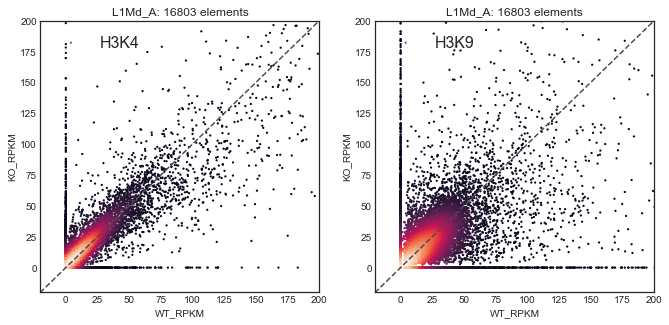

In [22]:
df1,df2,df3,df4=plot_H3K4_H3K9('L1Md_A',200)

In [4]:
PATH_FOLDER=os.getcwd() + '/bowtie2_map2_mm10_pMXs/genes_RPKM'
Cond1='/RPKM_H3K4'
Cond2='/RPKM_H3K9'
INPUT_LIST=os.listdir(PATH_FOLDER)
retrotransposon_name='SINE1'

INPUT_NAME='genes_read_count_5_H3K4me3_WT_MMERVK10C_34bc'
#INPUT_PATH_1 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_5_H3K4me3_WT_island_reads_'+retrotransposon_name+'_34bc.csv'
#INPUT_PATH_2 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_7_H3K4me3_mir34bc_KO_island_reads_'+retrotransposon_name+'_34bc.csv'

INPUT_PATH_1 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_5_H3K4me3_WT_'+retrotransposon_name+'_34bc.csv'
INPUT_PATH_2 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_7_H3K4me3_mir34bc_KO_'+retrotransposon_name+'_34bc.csv'


df1 = pd.read_csv(INPUT_PATH_1, sep='\t', header=0)
df2 = pd.read_csv(INPUT_PATH_2, sep='\t', header=0)



In [ ]:
xy = np.vstack([df3, df4])
z = gaussian_kde(xy)(xy)
ax[1].scatter(df3, df4, alpha=1.0,s=5, c=z, label='H3K9',edgecolor='')
ax[1].set_xlim(-0.1*range_limit,range_limit)
ax[1].set_ylim(-0.1*range_limit,range_limit)
ax[1].set_xlabel('WT_RPKM')
ax[1].set_ylabel('KO_RPKM')
ax[1].set_title(retrotransposon_name+': '+str(len(df1))+' elements')
ax[1].plot([-100,range_limit], [-100, range_limit], ls="--", c=".3")
ax[1].legend(loc=2, fontsize=16)

ValueError: c of shape (42785,) not acceptable as a color sequence for x with size 42785, y with size 42785

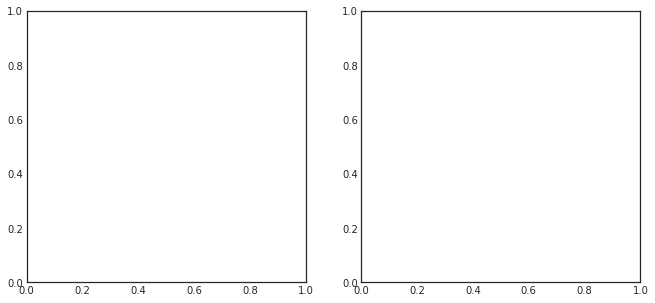

In [20]:
RPKM_12=pd.concat([df1, df2['RPKM']], axis=1, join='inner')


RPKM_12[(RPKM_12 != 0).all(1)]



# Calculate the point density
xy = np.vstack([RPKM_12.iloc[:,1],RPKM_12.iloc[:,2]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

ax[0].scatter(RPKM_12.iloc[:,[1]], RPKM_12.iloc[:,[2]], alpha=1.0,s=5,c=z, label='H3K4',edgecolor='')
ax[0].set_xlim(-0.1*range_limit,range_limit)
ax[0].set_ylim(-0.1*range_limit,range_limit)
ax[0].set_xlabel('WT_RPKM')
ax[0].set_ylabel('KO_RPKM')
ax[0].set_title(retrotransposon_name+': '+str(len(df1))+' elements')
ax[0].plot([-100,range_limit], [-100, range_limit], ls="--", c=".3")
ax[0].legend(loc=2, fontsize=16)
#plt.colorbar()





In [7]:
back up
def plot_H3K4_H3K9(retrotransposon_name,range_limit):
    PATH_FOLDER=os.getcwd() + '/bowtie2_map2_mm10_pMXs/genes_RPKM'
    Cond1='/RPKM_H3K4'
    Cond2='/RPKM_H3K9'
    INPUT_LIST=os.listdir(PATH_FOLDER)


    INPUT_NAME='genes_read_count_5_H3K4me3_WT_MMERVK10C_34bc'
    INPUT_PATH_1 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_5_H3K4me3_WT_'+retrotransposon_name+'_34bc.csv'
    INPUT_PATH_2 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_7_H3K4me3_mir34bc_KO_'+retrotransposon_name+'_34bc.csv'

    df1 = pd.read_csv(INPUT_PATH_1, sep='\t', header=0)
    df2 = pd.read_csv(INPUT_PATH_2, sep='\t', header=0)

    INPUT_PATH_3_a = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_April_'+ retrotransposon_name + '_34bc.csv'
    INPUT_PATH_3_b = PATH_FOLDER+Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_Dec_'+retrotransposon_name + '_34bc.csv'
    INPUT_PATH_3_c = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_10_New_H3K9me3_WT_'+retrotransposon_name+'_34bc.csv'


    INPUT_PATH_4_a = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_April_'+retrotransposon_name+'_34bc.csv'
    INPUT_PATH_4_b = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_Dec_'+retrotransposon_name+'_34bc.csv'
    INPUT_PATH_4_c = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_11_New_H3K9me3_mir34bc_KO_'+retrotransposon_name+'_34bc.csv'

    df3_a= pd.read_csv(INPUT_PATH_3_a, sep='\t', header=0)
    df3_b= pd.read_csv(INPUT_PATH_3_b, sep='\t', header=0)
    df3_c= pd.read_csv(INPUT_PATH_3_c, sep='\t', header=0)
    df3= (df3_a['RPKM']+df3_b['RPKM']+df3_c['RPKM'])/3.0

    df4_a= pd.read_csv(INPUT_PATH_4_a, sep='\t', header=0)
    df4_b= pd.read_csv(INPUT_PATH_4_b, sep='\t', header=0)
    df4_c= pd.read_csv(INPUT_PATH_4_c, sep='\t', header=0)
    df4= (df4_a['RPKM']+df4_b['RPKM']+df4_c['RPKM'])/3.0

    # Calculate the point density
    xy = np.vstack([df1['RPKM'], df2['RPKM']])
    z = gaussian_kde(xy)(xy)

    plt.subplot(121)
    plt.scatter(df1['RPKM'], df2['RPKM'], alpha=1.0,s=5,c=z, label='H3K4',edgecolor='')
    plt.xlim(0,range_limit)
    plt.ylim(0,range_limit)
    plt.xlabel('WT_RPKM')
    plt.ylabel('KO_RPKM')
    plt.title(retrotransposon_name+': '+str(len(df1))+' elements')
    plt.plot([0,range_limit], [0, range_limit], ls="--", c=".3")
    plt.legend()
    
    
    plt.subplot(122)
    xy = np.vstack([df3, df4])
    z = gaussian_kde(xy)(xy)
    plt.scatter(df3, df4, alpha=1.0,s=5, c=z, label='H3K9',edgecolor='')
    plt.xlim(0,range_limit)
    plt.ylim(0,range_limit)
    plt.xlabel('WT_RPKM')
    plt.ylabel('KO_RPKM')
    plt.title(retrotransposon_name+': '+str(len(df1))+' elements')
    plt.plot([0,range_limit], [0, range_limit], ls="--", c=".3")
    plt.legend()
    
    plt.colorbar()
    return df1,df2

SyntaxError: invalid syntax (<ipython-input-7-a321450c79de>, line 1)

In [14]:
PATH_FOLDER='~/cloud_research/PengGroup/XLi/Data/Paul/34bc/bowtie2_map2_mm10_pMXs/genes_Read_Count_H3K4_H3K9/bed_H3K4'



df_H3K4_r1=pd.read_csv(PATH_FOLDER+'/genes_read_count_5_H3K4me3_WT_Solo_LTR_MERVL_34bc.bed', sep='\t', header=-1)

df_H3K4_r2=pd.read_csv(PATH_FOLDER+'/genes_read_count_7_H3K4me3_mir34bc_KO_Solo_LTR_MERVL_34bc.bed', sep='\t', header=-1)


PATH_FOLDER='~/cloud_research/PengGroup/XLi/Data/Paul/34bc/bowtie2_map2_mm10_pMXs/genes_Read_Count_H3K4_H3K9/bed_H3K9'

df_H3K9_r1=pd.read_csv(PATH_FOLDER+'/genes_read_count_5_H3K4me3_WT_Solo_LTR_MERVL_34bc.bed', sep='\t', header=-1)

df_H3K9_r2=pd.read_csv(PATH_FOLDER+'/genes_read_count_5_H3K4me3_WT_Solo_LTR_MERVL_34bc.bed', sep='\t', header=-1)

In [13]:
df_H3K4_r1.describe()
df_H3K4_r2.describe()
#df1
df_r2

,0,1,2,3,4
0,chr10,3490826,3491142,MT2B1;,0
1,chr10,3492003,3492097,MT2B1;,0
2,chr10,3716997,3717431,MT2B1;,0
3,chr10,3717584,3717627,MT2B1;,0
4,chr10,3926013,3926365,MT2B1;,0
5,chr10,3926763,3926806,MT2B1;,0
6,chr10,5811917,5812366,MT2B1;,4
7,chr10,6619445,6619924,MT2B1;,0
8,chr10,7103187,7103382,MT2B1;,2
9,chr10,7431179,7431672,MT2B1;,2


In [7]:
df=df1[(df1.iloc[:,1]/df2.iloc[:,1]>0)][['gene_id']]
#df
df.insert(1,'RPKM_WT', df1[(df1.iloc[:,1]/df2.iloc[:,1]>0)]['RPKM'] )
df.insert(2,'RPKM_KO', df2[(df1.iloc[:,1]/df2.iloc[:,1]>0)]['RPKM'] )
df.insert(3,'ratio', df1[(df1.iloc[:,1]/df2.iloc[:,1]>0)]['RPKM']/df2[(df1.iloc[:,1]/df2.iloc[:,1]>0)]['RPKM'] )
df_sorted=df.sort_values(by=['ratio'])
df_sorted[df_sorted['ratio'] < 13]

,gene_id,RPKM_WT,RPKM_KO,ratio
1274,MT2B1;,881.911985,11535.935116,0.076449
4549,MT2B1;,231.156418,1778.625827,0.129963
674,MT2B1;,380.919731,2930.974954,0.129963
1269,MT2B1;,4796.210993,33828.937519,0.141778
6557,MT2B1;,139.889487,861.100228,0.162454
1973,MT2B1;,391.960882,2412.744600,0.162454
6119,MT2B1;,7212.080234,43007.172487,0.167695
2014,MT2B1;,281.721884,1517.390158,0.185662
1267,MT2B1;,372.183040,1861.437992,0.199944
463,MT2B1;,261.728718,1208.318062,0.216606


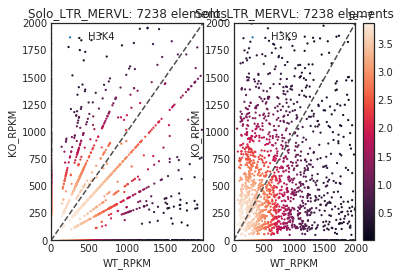

In [12]:
df1,df2=plot_H3K4_H3K9('Solo_LTR_MERVL',2000)

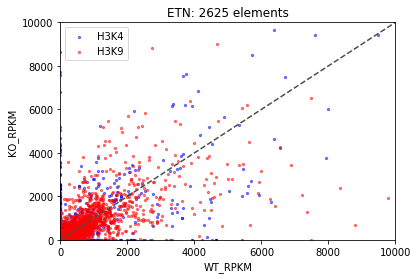

In [80]:
PATH_FOLDER=os.getcwd() + '/bowtie2_map2_mm10_pMXs/RPKM'
Cond1='/RPKM_H3K4'
Cond2='/RPKM_H3K9'
INPUT_LIST=os.listdir(PATH_FOLDER)


INPUT_NAME='genes_read_count_5_H3K4me3_WT_MMERVK10C_34bc'
INPUT_PATH_1 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_5_H3K4me3_WT_ETN_34bc.csv'
INPUT_PATH_2 = PATH_FOLDER+Cond1+'/RPKM_genes_read_count_7_H3K4me3_mir34bc_KO_ETN_34bc.csv'

df1 = pd.read_csv(INPUT_PATH_1, sep='\t', header=0)
df2 = pd.read_csv(INPUT_PATH_2, sep='\t', header=0)

retrotransposon_name='ETN'

INPUT_PATH_3_a = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_April_'+ retrotransposon_name + '_34bc.csv'
INPUT_PATH_3_b = PATH_FOLDER+Cond2 + '/RPKM_genes_read_count_8_H3K9me3_WT_Dec_'+retrotransposon_name + '_34bc.csv'
INPUT_PATH_3_c = PATH_FOLDER + Cond2 + '/RPKM_genes_read_count_10_New_H3K9me3_WT_'+retrotransposon_name+'_34bc.csv'


INPUT_PATH_4_a = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_April_'+retrotransposon_name+'_34bc.csv'
INPUT_PATH_4_b = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_9_H3K9me3_mir34bc_KO_Dec_'+retrotransposon_name+'_34bc.csv'
INPUT_PATH_4_c = PATH_FOLDER+Cond2+'/RPKM_genes_read_count_11_New_H3K9me3_mir34bc_KO_'+retrotransposon_name+'_34bc.csv'

df3_a= pd.read_csv(INPUT_PATH_3_a, sep='\t', header=0)
df3_b= pd.read_csv(INPUT_PATH_3_b, sep='\t', header=0)
df3_c= pd.read_csv(INPUT_PATH_3_c, sep='\t', header=0)
df3= (df3_a['RPKM']+df3_b['RPKM']+df3_c['RPKM'])/3.0

df4_a= pd.read_csv(INPUT_PATH_4_a, sep='\t', header=0)
df4_b= pd.read_csv(INPUT_PATH_4_b, sep='\t', header=0)
df4_c= pd.read_csv(INPUT_PATH_4_c, sep='\t', header=0)
df4= (df4_a['RPKM']+df4_b['RPKM']+df4_c['RPKM'])/3.0


range_limit=10000
plt.scatter(df1['RPKM'], df2['RPKM'], alpha=0.5,s=5,c='b', label='H3K4')
plt.scatter(df3, df4, alpha=0.5,s=5, c='r', label='H3K9')
plt.xlim(0,range_limit)
plt.ylim(0,range_limit)
plt.xlabel('WT_RPKM')
plt.ylabel('KO_RPKM')
plt.title(retrotransposon_name+': '+str(len(df1))+' elements')
plt.plot([0,range_limit], [0, range_limit], ls="--", c=".3")
plt.legend()

In [26]:
#df[df.loc[:,'repeat'].str.contains('B1_Mus1')]#['repeat'].unique()
#df[df.loc[:,'class/family'].str.contains('RLTR4')]


In [59]:
#### Prepare Input Path
PATH_FOLDER=os.getcwd()+'/suggested_species/'
#PATH_FOLDER='/home/lxiang/cloud_research/PengGroup/XLi/Data/Paul/34bc'+

INPUT_LIST=os.listdir(PATH_FOLDER)
df=pd.read_csv(PATH_FOLDER+INPUT_LIST[0],header=-1, sep='\s+')

print(INPUT_LIST[:])


['SINE_and_B1_list.bed', 'IAP_list.bed', 'RLTR4_list.bed', 'MMERGLN_list.bed', 'L1MdA_list.bed', 'ERVK10C_list.bed', 'ETn_list.bed', 'MERVL_list.bed']


In [63]:
df[10].unique()

array(['SINE/B4', 'SINE/Alu'], dtype=object)

In [43]:
OUT_PATH_FOLDER=os.getcwd()+'/suggested_species_filtered/'
if ( not os.path.isdir(OUT_PATH_FOLDER) ):
    print "Not exist"
    os.mkdir(OUT_PATH_FOLDER)
#PATH_FOLDER='/home/lxiang/cloud_research/PengGroup/XLi/Data/Paul/34bc'+

for list_name in INPUT_LIST:
    df=pd.read_csv(PATH_FOLDER+list_name,header=-1, sep='\s+')
    print (list_name)
    df[ df[4].str.len() < 6].loc[:,[4,5,6,9,10]].to_csv(OUT_PATH_FOLDER+list_name, sep='\t',index=None)
    
    

SINE_and_B1_list.bed
IAP_list.bed
RLTR4_list.bed
MMERGLN_list.bed
L1MdA_list.bed
ERVK10C_list.bed
ETn_list.bed
MERVL_list.bed


0           ID_B1
1         B1_Mus1
2          PB1D10
3          PB1D11
4          PB1D11
5             B1F
6          PB1D11
7         B1_Mus1
8           B1_Mm
9         B1_Mus1
10        B1_Mus1
11           B1F2
12        B1_Mus1
13           B1F1
14            B1F
15         PB1D11
16           B1F2
17           B1F2
18          B1_Mm
19          B1_Mm
20          PB1D7
21            B1F
22          ID_B1
23          B1_Mm
24        B1_Mur4
25            B1F
26           B1F2
27            B1F
28        B1_Mus2
29         PB1D11
           ...   
683883    B1_Mus2
683884    B1_Mus2
683885    B1_Mus2
683886    B1_Mus2
683887    B1_Mus2
683888    B1_Mus2
683889    B1_Mus2
683890    B1_Mus2
683891    B1_Mus1
683892    B1_Mus2
683893    B1_Mur3
683894    B1_Mur4
683895      B1_Mm
683896      B1_Mm
683897    B1_Mus2
683898    B1_Mus2
683899    B1_Mus2
683900    B1_Mus2
683901    B1_Mus2
683902    B1_Mus2
683903    B1_Mus2
683904    B1_Mus2
683905    B1_Mus2
683906    B1_Mur3
683907    

In [58]:
for list_name in INPUT_LIST:
    df=pd.read_csv(OUT_PATH_FOLDER+list_name,header=0, sep='\s+')
    print(list_name)
    print(len(df['9'].unique()))
    print("")
#

SINE_and_B1_list.bed
16

IAP_list.bed
25

RLTR4_list.bed
30

MMERGLN_list.bed
2

L1MdA_list.bed
7

ERVK10C_list.bed
1

ETn_list.bed
4

MERVL_list.bed
2



In [77]:
df_list.loc[:,9].unique()

array(['MMETn-int', 'ETnERV-int', 'ETnERV2-int', 'ETnERV3-int'],
      dtype=object)

In [75]:
#for name in df_list.loc[:,9]:


MMETn-int
ETnERV-int
MMETn-int
ETnERV-int
ETnERV-int
MMETn-int
MMETn-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
ETnERV-int
MMETn-int
MMETn-int
MMETn-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
MMETn-int
MMETn-int
MMETn-int
ETnERV2-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV-int
ETnERV-int
ETnERV2-int
ETnERV2-int
MMETn-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
MMETn-int
MMETn-int
MMETn-int
ETnERV-int
ETnERV-int
ETnERV-int
MMETn-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV-int
MMETn-int
MMETn-int
MMETn-int
MMETn-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV3-int
ETnERV3-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV3-int
ETnERV3-int
ETnERV2-int
ETnERV2-int
ETnERV-int
ETnERV-int
ETnERV-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
MME

MMETn-int
ETnERV-int
ETnERV-int
MMETn-int
MMETn-int
MMETn-int
ETnERV-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV2-int
ETnERV2-int
MMETn-int
MMETn-int
MMETn-int
ETnERV-int
ETnERV2-int
ETnERV-int
MMETn-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV-int
MMETn-int
ETnERV2-int
ETnERV-int
MMETn-int
ETnERV-int
ETnERV-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV2-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
MMETn-int
ETnERV-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV-int
ETnERV-int
ETnERV3-int
ETnERV3-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
ETnERV-int
MMETn-

MMETn-int
ETnERV2-int
MMETn-int
ETnERV3-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
MMETn-int
ETnERV2-int
MMETn-int
MMETn-int
MMETn-int
MMETn-int
ETnERV2-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV-int
ETnERV-int
MMETn-int
MMETn-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV-int
MMETn-int
ETnERV-int
ETnERV-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV2-int
MMETn-int
ETnERV2-int
ETnERV2-int
ETnERV-int
ETnERV-int
ETnERV-int
ETnERV-int
MMETn-int
ETnERV2-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV2-int
ETnERV2-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV3-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-int
ETnERV2-i